Tennis - GaussianNB

Tennis
taken from:- http://daydreamingnumbers.com/blog/introduction-naive-bayes-algorithm-python/

In [1]:
import pandas as pd
import numpy as np

data = [['sunny','hot','high','false','no'],
['sunny','hot','high','true','no'],
['overcast','hot','high','false','yes'],
['rainy','mild','high','false','yes'],
['rainy','cool','normal','false','yes'],
['rainy','cool','normal','true','no'],
['overcast','cool','normal','true','yes'],
['sunny','mild','high','false','no'],
['sunny','cool','normal','false','yes'],
['rainy','mild','normal','false','yes'],
['sunny','mild','normal','true','yes'],
['overcast','mild','high','true','yes'],
['overcast','hot','normal','false','yes'],
['rainy','mild','high','true','no']]


cols = ['outlook','temp','humidity','windy','play']
df = pd.DataFrame(data, columns=cols)
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,false,no
1,sunny,hot,high,true,no
2,overcast,hot,high,false,yes
3,rainy,mild,high,false,yes
4,rainy,cool,normal,false,yes
5,rainy,cool,normal,true,no
6,overcast,cool,normal,true,yes
7,sunny,mild,high,false,no
8,sunny,cool,normal,false,yes
9,rainy,mild,normal,false,yes


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#map
outlook1={'sunny':1, 'overcast':2, 'rainy':3}
df.outlook=df.outlook.map(outlook1)

temp1={'hot':1, 'mild':2, 'cool':3}
df.temp=df.temp.map(temp1)

humid1={'normal':1, 'high':2}
df.humidity=df.humidity.map(humid1)

wind1={'true':1, 'false':0}
df.windy=df.windy.map(wind1)

play1={'yes':1, 'no':0}
df.play=df.play.map(play1)

df

,outlook,temp,humidity,windy,play
0,1,1,2,0,0
1,1,1,2,1,0
2,2,1,2,0,1
3,3,2,2,0,1
4,3,3,1,0,1
5,3,3,1,1,0
6,2,3,1,1,1
7,1,2,2,0,0
8,1,3,1,0,1
9,3,2,1,0,1


In [4]:
#sfuffle df
df = df.sample(frac = 1)
df

,outlook,temp,humidity,windy,play
12,2,1,1,0,1
8,1,3,1,0,1
5,3,3,1,1,0
1,1,1,2,1,0
6,2,3,1,1,1
13,3,2,2,1,0
2,2,1,2,0,1
3,3,2,2,0,1
0,1,1,2,0,0
10,1,2,1,1,1


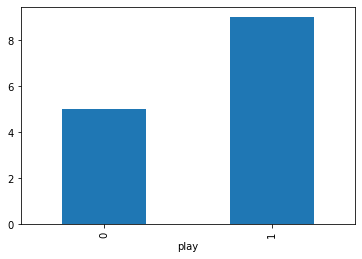

In [5]:
df.groupby('play').play.count().plot.bar(ylim=0)
plt.show()

In [6]:
play = df.groupby('play').play.count()
play

play
0    5
1    9
Name: play, dtype: int64

In [7]:
percent_play = (play / len(df)) * 100
percent_play

play
0    35.714286
1    64.285714
Name: play, dtype: float64

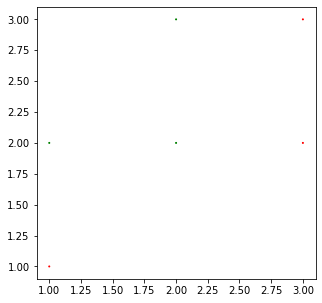

In [8]:
plt.figure(figsize=(5, 5))
ax = plt.subplot()
ax.scatter(df[df['play'] == 1]['outlook'], df[df['play'] == 1]['temp'], c='green', s=df[df['play'] == 1]['windy'])
ax.scatter(df[df['play'] == 0]['outlook'], df[df['play'] == 0]['temp'], c='red', s=df[df['play'] == 0]['windy']);

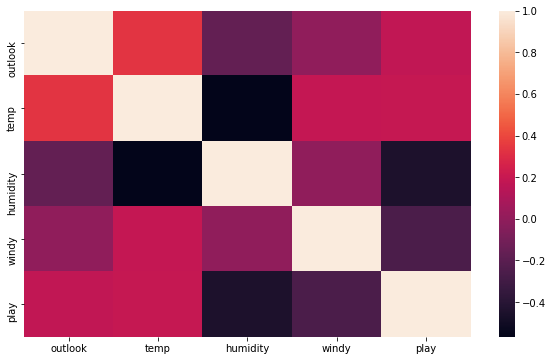

In [9]:
#create a heatmap to correlate promotion
plt.figure(figsize=(10,6))
cmap=df.corr()
sns.heatmap(cmap)

In [10]:
target = df.play

df.drop(['play'], axis = 1, inplace = True)
df

,outlook,temp,humidity,windy
12,2,1,1,0
8,1,3,1,0
5,3,3,1,1
1,1,1,2,1
6,2,3,1,1
13,3,2,2,1
2,2,1,2,0
3,3,2,2,0
0,1,1,2,0
10,1,2,1,1


In [11]:
y = target
X = df

In [12]:
rows = int(len(df) * .7)

X_train = X[: rows]
y_train = y[: rows]

X_val = X[rows :]
y_val = y[rows :]

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((9, 4), (9,), (5, 4), (5,))

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB().fit(X_train, y_train)
print(model.score(X_train, y_train))

0.8888888888888888


In [14]:
y_pred = model.predict(X_val)
print(accuracy_score(y_val, y_pred))

0.4


In [15]:
print(y_pred)

[0 1 1 1 0]


In [16]:
print(model.predict([[2,1,1,0]]))

[1]


Two moons dataset - SVC 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.1)

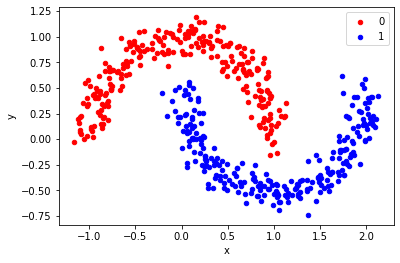

In [18]:
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [19]:
df

,x,y,label
0,1.947995,0.537788,1
1,0.124761,0.005985,1
2,1.058631,-0.689944,1
3,-0.019605,0.211318,1
4,1.632036,-0.320356,1
...,...,...,...
495,0.777622,-0.389819,1
496,-0.515613,0.961722,0
497,0.898654,0.325763,0
498,0.034550,1.023021,0


In [20]:
target = df.label
df.drop(['label'], axis=1, inplace=True)

y = target
X = df

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state=1)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((400, 2), (400,), (100, 2), (100,))

In [22]:
from sklearn.svm import SVC

model = SVC(kernel='rbf').fit(X_train, y_train)
#model = SVC(kernel='poly', degree=5).fit(X_train, y_train)
#model = SVC(kernel='sigmoid').fit(X_train, y_train)

print(model.score(X_train, y_train))

0.9975


In [23]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

1.0


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[49  0]
 [ 0 51]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        51

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



Calculate entropy in decision tree classifier

In [25]:
import pandas as pd
import numpy as np

data = [['steep','bumpy','yes','slow'],
['steep','smooth','yes','slow'],
['flat','bumpy','no','fast'],
['steep','smooth','no','fast']]


cols = ['grade','bumpiness','speedlimit','speed']
df = pd.DataFrame(data, columns=cols)
df

,grade,bumpiness,speedlimit,speed
0,steep,bumpy,yes,slow
1,steep,smooth,yes,slow
2,flat,bumpy,no,fast
3,steep,smooth,no,fast


In [26]:
speed1 = { 'slow': 0, 'fast':1}
df.speed = df.speed.map(speed1)
df

,grade,bumpiness,speedlimit,speed
0,steep,bumpy,yes,0
1,steep,smooth,yes,0
2,flat,bumpy,no,1
3,steep,smooth,no,1


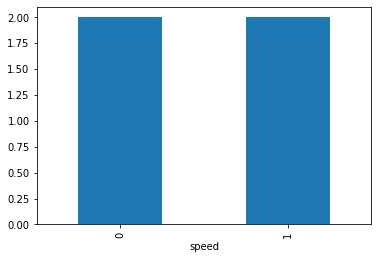

In [27]:
import matplotlib.pyplot as plt

df.groupby('speed').speed.count().plot.bar(ylim=0)
plt.show()

In [28]:
percentage = (df.speed.value_counts() / len(df.speed)) * 100
percentage

1    50.0
0    50.0
Name: speed, dtype: float64

In [29]:
zeros = (df['speed'] == 0).sum()
print(zeros)

2


In [30]:
ones = (df['speed'] == 1).sum()
print(ones)

2


In [31]:
#calculate entrophy
import math

entropy = -zeros/len(df) * math.log(zeros/len(df), 2) - ones/len(df) * math.log(ones/len(df), 2)
print(entropy)

1.0


Make blobs and predict - Decision Trees

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=260, centers=4, n_features=2)

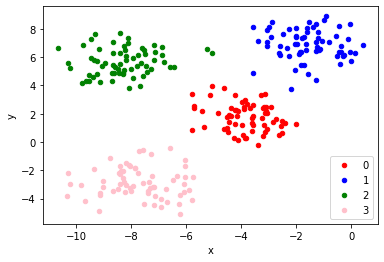

In [33]:
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green', 3: 'pink'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [34]:
df

,x,y,label
0,-8.263648,6.797696,2
1,-1.714408,5.451754,1
2,0.138581,6.259272,1
3,-7.568970,-0.583091,3
4,-9.122569,4.220945,2
...,...,...,...
255,-4.210909,2.287960,0
256,-5.710706,2.373678,0
257,-2.610757,6.809546,1
258,-3.617606,1.672121,0


In [35]:
target = df.label
df.drop(['label'], axis=1, inplace=True)

y = target
X = df

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state=1)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((208, 2), (208,), (52, 2), (52,))

In [37]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=1, min_samples_split=50, criterion='entropy').fit(X_train, y_train)

print(model.score(X_train, y_train))

0.9951923076923077


In [38]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

1.0


In [39]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[ 5  0  0  0]
 [ 0 20  0  0]
 [ 0  0 14  0]
 [ 0  0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        13

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52



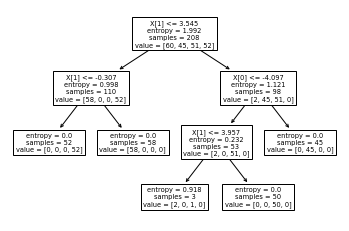

In [40]:
from sklearn import tree

tree.plot_tree(model)
plt.show()

Make circles and predict - Extra Trees

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, noise=0.05)

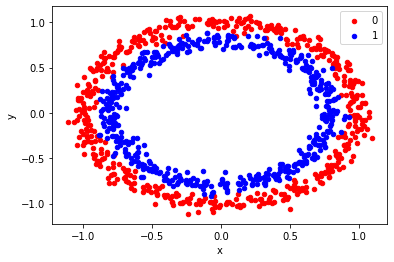

In [42]:
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [43]:
target = df.label
df.drop(['label'], axis=1, inplace=True)

y = target
X = df

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.10, random_state=1)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((900, 2), (900,), (100, 2), (100,))

In [45]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(random_state=1, min_samples_leaf=1, min_samples_split=50, n_estimators=500, criterion='gini', max_depth=10, max_features='log2').fit(X_train, y_train)

print(model.score(X_train, y_train))

0.9677777777777777


In [46]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

0.98


In [47]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[48  1]
 [ 1 50]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        49
           1       0.98      0.98      0.98        51

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



Make classifier with K Nearest Neighbor

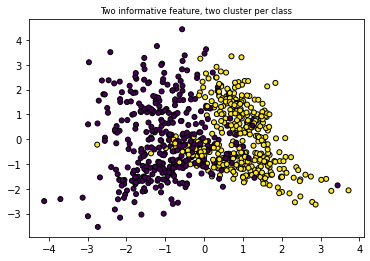

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification

X, y = make_classification(n_samples=750, n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=2, random_state=1)

df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

plt.title("Two informative feature, two cluster per class", fontsize='small')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

In [49]:
df

,x,y,label
0,-0.602872,2.347016,0
1,-1.109151,-2.141204,0
2,-0.478857,-1.933048,0
3,0.751006,1.279846,1
4,-1.057333,-1.622860,0
...,...,...,...
745,0.714608,-0.961406,0
746,2.424904,-1.248303,1
747,-1.036092,-0.275206,0
748,-0.555257,-1.762747,0


In [50]:
target = df.label
df.drop(['label'], axis=1, inplace=True)

y = target
X = df

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.10, random_state=1)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((675, 2), (675,), (75, 2), (75,))

In [51]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(weights='distance', algorithm='auto', n_neighbors=5, p=2).fit(X_train, y_train)
print(model.score(X_train, y_train))

1.0


In [52]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

0.9066666666666666


In [53]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[37  1]
 [ 6 31]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        38
           1       0.97      0.84      0.90        37

    accuracy                           0.91        75
   macro avg       0.91      0.91      0.91        75
weighted avg       0.91      0.91      0.91        75



Make Regressor

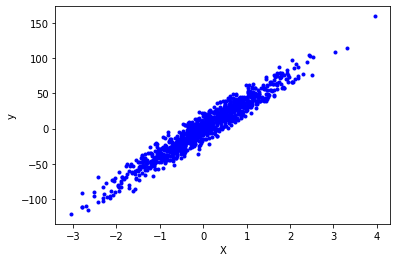

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=1, n_informative=1, noise=10, random_state=1)

df = pd.DataFrame({'X': X.flatten(), 'y': y})

plt.scatter(X, y, color='blue', marker='.', label='y')
plt.xlabel("X") 
plt.ylabel("y")
plt.show()

In [55]:
df

,X,y
0,-1.067877,-22.338036
1,-0.291595,-4.093750
2,0.050808,14.731253
3,0.621804,38.248557
4,-0.545774,-15.619815
...,...,...
995,-1.373117,-42.447468
996,0.169869,13.789153
997,0.081768,-7.115409
998,1.167075,40.522812


In [56]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.10, random_state=1)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((900, 1), (900,), (100, 1), (100,))

In [58]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
print(model.score(X_train, y_train))

0.9342358709722448


In [59]:
print(model.intercept_)

0.27877376074904214


In [60]:
print(model.coef_)

[38.34268897]


In [61]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

0.9321157854518706


In [62]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Mean Absolute Error: 8.411515215663275
Mean Squared Error: 111.2285361843432
Root Mean Squared Error: 10.546494023339852


In [63]:
compare = pd.DataFrame({'actual': y_val, 'predicted': y_pred})
print(compare)

       actual  predicted
0  -23.799923 -22.956180
1  -26.976108 -30.378027
2   97.083018  79.124974
3   44.424789  50.221489
4   14.151963   5.558608
..        ...        ...
95  45.630403  47.229692
96  -6.284938  -1.997551
97  28.409540  28.384856
98  73.526420  75.702744
99  59.644417  70.626781

[100 rows x 2 columns]


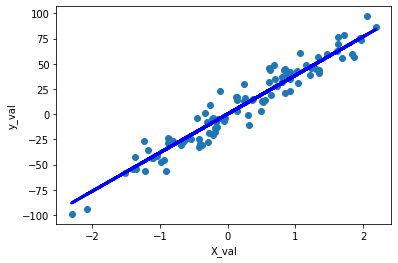

In [64]:
plt.scatter(X_val, y_val)
plt.plot(X_val, y_pred, color='blue', linewidth=3)
plt.xlabel('X_val')
plt.ylabel('y_val')
plt.show()

Multivariate regressor - Kernel Ridge

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression

features, y = make_regression(n_samples=1000, n_features=4, n_informative=1, noise=10, random_state=1)

features = pd.DataFrame(features, columns=['X1', 'X2', 'X3', 'X4'])
features

,X1,X2,X3,X4
0,-0.186441,-0.355242,0.569125,0.197316
1,0.447175,-0.696128,-0.993981,-1.329708
2,-1.255601,1.046661,0.594272,0.215860
3,1.208456,1.115702,0.017165,-0.429142
4,0.167433,1.025750,-0.205678,0.015749
...,...,...,...,...
995,-1.080711,0.725474,0.743357,-1.509573
996,1.423614,0.903999,-0.508972,-0.166486
997,-0.701649,-0.407370,-1.424334,1.294182
998,-1.895267,0.089729,-1.049068,0.316659


In [66]:
y = pd.DataFrame(y, columns=['y'])
print(y)

              y
0     35.742675
1    -96.779430
2     51.194042
3     -8.240220
4     -5.610018
..          ...
995   65.154809
996  -47.531021
997 -110.793327
998 -103.704062
999  -70.730700

[1000 rows x 1 columns]


In [67]:
df = pd.concat([features, y], axis=1)
df

,X1,X2,X3,X4,y
0,-0.186441,-0.355242,0.569125,0.197316,35.742675
1,0.447175,-0.696128,-0.993981,-1.329708,-96.779430
2,-1.255601,1.046661,0.594272,0.215860,51.194042
3,1.208456,1.115702,0.017165,-0.429142,-8.240220
4,0.167433,1.025750,-0.205678,0.015749,-5.610018
...,...,...,...,...,...
995,-1.080711,0.725474,0.743357,-1.509573,65.154809
996,1.423614,0.903999,-0.508972,-0.166486,-47.531021
997,-0.701649,-0.407370,-1.424334,1.294182,-110.793327
998,-1.895267,0.089729,-1.049068,0.316659,-103.704062


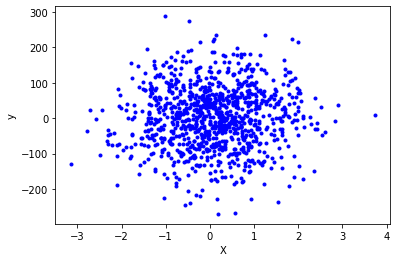

In [68]:
plt.scatter(features.iloc[:, 1], y, color='blue', marker='.', label='y')
plt.xlabel("X") 
plt.ylabel("y")
plt.show()

In [69]:
df

,X1,X2,X3,X4,y
0,-0.186441,-0.355242,0.569125,0.197316,35.742675
1,0.447175,-0.696128,-0.993981,-1.329708,-96.779430
2,-1.255601,1.046661,0.594272,0.215860,51.194042
3,1.208456,1.115702,0.017165,-0.429142,-8.240220
4,0.167433,1.025750,-0.205678,0.015749,-5.610018
...,...,...,...,...,...
995,-1.080711,0.725474,0.743357,-1.509573,65.154809
996,1.423614,0.903999,-0.508972,-0.166486,-47.531021
997,-0.701649,-0.407370,-1.424334,1.294182,-110.793327
998,-1.895267,0.089729,-1.049068,0.316659,-103.704062


In [70]:
import statsmodels.api as sm

SM_model = sm.OLS(y, features).fit()
print(SM_model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.789e+04
Date:                Fri, 30 Jul 2021   Prob (F-statistic):                        0.00
Time:                        06:30:52   Log-Likelihood:                         -3739.8
No. Observations:                1000   AIC:                                      7488.
Df Residuals:                     996   BIC:                                      7507.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [71]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.10, random_state=1)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((900, 4), (900,), (100, 4), (100,))

In [72]:
from sklearn.kernel_ridge import KernelRidge

model = KernelRidge().fit(X_train, y_train)
print(model.score(X_train, y_train))

0.9865794253492605


In [73]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

0.9826911548621899


In [74]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Mean Absolute Error: 8.108232487151309
Mean Squared Error: 107.7432872330296
Root Mean Squared Error: 10.379946398369771


In [75]:
compare = pd.DataFrame({'actual': y_val, 'predicted': y_pred})
print(compare)

        actual   predicted
0   -82.587044  -73.256836
1   -46.509526  -53.378105
2  -132.160021 -119.694334
3    40.981496   26.091056
4    -0.057456    2.605733
..         ...         ...
95  175.432653  174.317057
96   76.268566   72.955686
97   61.104618   74.055084
98  -39.972980  -44.921945
99   57.303303   57.522478

[100 rows x 2 columns]


How to find and remove outliers

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression

features, y = make_regression(n_samples=1000, n_features=5, noise=15, random_state=1)

features = pd.DataFrame(features, columns=['X1', 'X2', 'X3', 'X4', 'X5'])
features

,X1,X2,X3,X4,X5
0,1.869022,-1.593148,2.301561,-1.106284,0.990264
1,-1.043400,1.320418,0.471534,0.956689,0.518969
2,0.194242,-1.061130,-0.366098,0.938927,-1.323831
3,0.463217,0.475341,-0.688159,1.750722,0.565973
4,-0.108010,0.567931,-1.146575,0.423871,-0.692175
...,...,...,...,...,...
995,0.007627,-0.206823,-0.034551,-1.109386,-1.156086
996,0.211096,1.119552,1.192294,1.231123,1.446394
997,-1.035038,-1.778318,-0.461850,-1.300474,-1.438745
998,0.177654,-0.638601,0.530070,1.550482,-0.876251


In [77]:
y = pd.DataFrame(y, columns=['y'])
print(y)

              y
0    125.292775
1    -31.539149
2    -12.402882
3    133.571935
4      4.017033
..          ...
995  -69.290661
996   97.617531
997 -195.839458
998   47.921170
999  -81.382308

[1000 rows x 1 columns]


In [78]:
df = pd.concat([features, y], axis=1)
df

,X1,X2,X3,X4,X5,y
0,1.869022,-1.593148,2.301561,-1.106284,0.990264,125.292775
1,-1.043400,1.320418,0.471534,0.956689,0.518969,-31.539149
2,0.194242,-1.061130,-0.366098,0.938927,-1.323831,-12.402882
3,0.463217,0.475341,-0.688159,1.750722,0.565973,133.571935
4,-0.108010,0.567931,-1.146575,0.423871,-0.692175,4.017033
...,...,...,...,...,...,...
995,0.007627,-0.206823,-0.034551,-1.109386,-1.156086,-69.290661
996,0.211096,1.119552,1.192294,1.231123,1.446394,97.617531
997,-1.035038,-1.778318,-0.461850,-1.300474,-1.438745,-195.839458
998,0.177654,-0.638601,0.530070,1.550482,-0.876251,47.921170


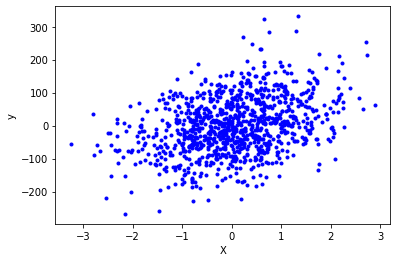

In [79]:
plt.scatter(features.iloc[:, 4], y, color='blue', marker='.', label='y')
plt.xlabel("X") 
plt.ylabel("y")
plt.show()

In [80]:
df

,X1,X2,X3,X4,X5,y
0,1.869022,-1.593148,2.301561,-1.106284,0.990264,125.292775
1,-1.043400,1.320418,0.471534,0.956689,0.518969,-31.539149
2,0.194242,-1.061130,-0.366098,0.938927,-1.323831,-12.402882
3,0.463217,0.475341,-0.688159,1.750722,0.565973,133.571935
4,-0.108010,0.567931,-1.146575,0.423871,-0.692175,4.017033
...,...,...,...,...,...,...
995,0.007627,-0.206823,-0.034551,-1.109386,-1.156086,-69.290661
996,0.211096,1.119552,1.192294,1.231123,1.446394,97.617531
997,-1.035038,-1.778318,-0.461850,-1.300474,-1.438745,-195.839458
998,0.177654,-0.638601,0.530070,1.550482,-0.876251,47.921170


In [81]:
import statsmodels.api as sm

SM_model = sm.OLS(y, features).fit()
print(SM_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              6355.
Date:                Fri, 30 Jul 2021   Prob (F-statistic):                        0.00
Time:                        06:30:53   Log-Likelihood:                         -4123.5
No. Observations:                1000   AIC:                                      8257.
Df Residuals:                     995   BIC:                                      8282.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [82]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.10, random_state=1)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((900, 5), (900,), (100, 5), (100,))

In [83]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(contamination=0.01, n_neighbors=20, novelty=False)
yhat = lof.fit_predict(X_train)

# select all rows that are not outliers
mask = yhat != -1

#select all rows that are outliers
non_mask = yhat == -1
X_outlier, y_outlier = X_train[non_mask, :], y_train[non_mask]
print(X_outlier, "\n\n", y_outlier)

[[ 2.59625359  1.66577009  1.04556738  2.0043766   0.22344646]
 [ 3.7402489  -0.45877498 -1.63647401  0.72282268  1.34027191]
 [ 1.18901076 -1.81472709 -2.61729009  0.18174103 -2.31842848]
 [-0.61803685 -2.50644065 -1.94258918 -2.11416392 -2.03720123]
 [ 0.85405084  2.44537804 -1.35810146  2.08721374  0.66155578]
 [ 0.29811228  2.89359255 -2.25107655  2.74215521 -0.13263657]
 [ 3.9586027  -1.39881282  0.10734329  0.08176782  0.64864364]
 [-0.3558323   0.44031311  3.13504734 -1.43919436  2.89438619]
 [-0.1218591  -2.91449892 -2.27215913  0.39093519  0.19084898]] 

 [ 268.66291967  331.68511383   19.58721639 -202.13003797  179.89088805
  117.78732809  324.72576188   61.62286947  -18.49514481]


In [84]:
X_train, y_train = X_train[mask, :], y_train[mask]

# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

(891, 5) (891,)


In [85]:
outliers = [each[1] for each in list(zip(yhat, X_train.tolist())) if each[0] == -1]

print(len(outliers))

for i in outliers:
  print(i)

9
[0.3778297912979604, 0.09986144802354702, -2.182425399509166, -0.2056777237581383, 1.230299344816437]
[0.09782983053975428, 0.48125579224153536, 0.2921736528161169, 1.7981625491134277, 1.1053352851540197]
[-0.7313332135876747, 1.0534759531187834, 0.33288725589561, -1.2506780630612555, -0.007587084742426058]
[1.0090902626721503, -0.31663164258546, -0.5516802438110113, -0.4449950027159164, 0.11197268749652817]
[-0.0521998698542908, 2.252553060760863, 0.29702659916951785, -1.010409948700302, 0.4608289844097452]
[0.6848194568419582, 0.23311263636668741, 0.1650850837802196, -1.8027220504245314, 1.1774543938903057]
[0.515413801783241, 0.6745707069560037, -0.7673098263317347, 1.460892380463078, -1.1148710523659369]
[-0.6832707184137332, 0.24967101487352886, -0.8912576389118602, -0.6631558312958422, -0.23558565194673464]
[-2.0175496143837366, -0.41681131644593494, -0.04413434220979173, 0.5221263819267481, 0.919058572264923]


In [86]:
from sklearn.linear_model import ARDRegression

model = ARDRegression().fit(X_train, y_train)
print(model.score(X_train, y_train))

0.9665993454434905


In [87]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

0.9806421102654281


In [88]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Mean Absolute Error: 10.15785621533394
Mean Squared Error: 167.1189478634526
Root Mean Squared Error: 12.927449395122482


In [89]:
compare = pd.DataFrame({'actual': y_val, 'predicted': y_pred})
print(compare)

        actual   predicted
0   231.808827  233.929198
1    81.857408   98.222053
2   -73.902184  -82.924573
3   118.597790  137.890800
4  -112.138943  -83.968440
..         ...         ...
95  -40.110311  -68.857069
96  -83.431496  -74.981493
97   11.033573   -2.941386
98  -39.902635  -38.561806
99   28.332267   30.503332

[100 rows x 2 columns]


Blobs for KMeans Clustering

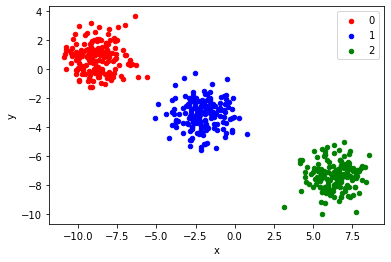

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, centers=3, n_features=2)

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

colors = {0:'red', 1:'blue', 2: 'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [91]:
df

,x,y,label
0,-1.821287,-3.948676,1
1,-1.923718,-5.138109,1
2,-9.051874,-0.788425,0
3,-1.460721,-3.115308,1
4,-8.592684,-0.263757,0
...,...,...,...
495,-10.417176,1.076235,0
496,-2.377571,-2.193771,1
497,-9.410599,0.881942,0
498,5.789146,-8.106213,2


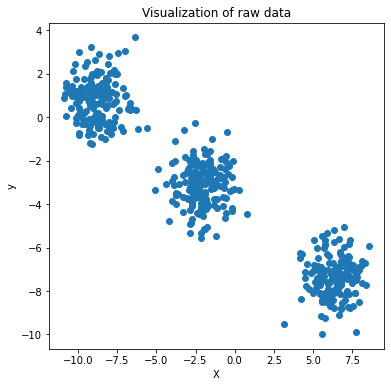

In [92]:
# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('X')
plt.ylabel('y')
plt.title('Visualization of raw data');

In [93]:
target = df.label
df.drop(['label'], axis=1, inplace=True)

y = target
X = df

from sklearn.cluster import KMeans

kmeans = kmeans = KMeans(n_clusters=3, max_iter=2000, algorithm = 'auto', random_state=1)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [94]:
correct = 0

prediction = kmeans.predict(X)

pred_df = pd.DataFrame({'actual': y, 'prediction': prediction})
print(pred_df)

     actual  prediction
0         1           2
1         1           2
2         0           0
3         1           2
4         0           0
..      ...         ...
495       0           0
496       1           2
497       0           0
498       2           1
499       1           2

[500 rows x 2 columns]


In [95]:
for i in range(len(y)):
  if prediction[i] == y[i]:
    correct += 1

print(correct/len(y))

0.334


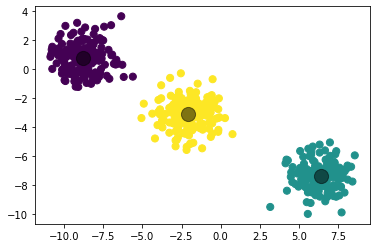

In [96]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=prediction, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

Make Classifier with normalisation

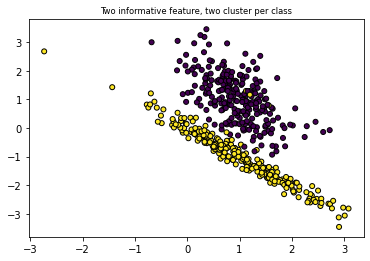

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=1, random_state=1)

df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

plt.title("Two informative feature, two cluster per class", fontsize='small')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

In [98]:
df

,x,y,label
0,2.396657,-2.518370,1
1,0.229085,1.018838,0
2,-0.083932,-0.162914,1
3,0.679985,-0.935591,1
4,0.947067,1.311654,0
...,...,...,...
495,0.649535,-0.586074,1
496,0.716810,-0.855462,1
497,-0.054394,0.349279,1
498,0.089394,1.255980,0


In [99]:
target = df.label
df.drop(['label'], axis=1, inplace=True)

y = target
X = df

In [100]:
#SVC and KMeans are affected by noemalisation

X = (X - X.min()) / (X.max() - X.min())
X

,x,y
0,0.881750,0.135913
1,0.509338,0.647642
2,0.455559,0.476677
3,0.586808,0.364894
4,0.632695,0.690004
...,...,...
495,0.581576,0.415459
496,0.593134,0.376486
497,0.460634,0.550777
498,0.485338,0.681949


In [101]:
from sklearn.cluster import KMeans

kmeans = kmeans = KMeans(n_clusters=2, max_iter=1000, algorithm = 'auto', random_state=1)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [102]:
correct = 0

prediction = kmeans.predict(X)

pred_df = pd.DataFrame({'actual': y, 'prediction': prediction})
print(pred_df)

     actual  prediction
0         1           1
1         0           0
2         1           0
3         1           1
4         0           0
..      ...         ...
495       1           1
496       1           1
497       1           0
498       0           0
499       0           1

[500 rows x 2 columns]


In [103]:
for i in range(len(y)):
  if prediction[i] == y[i]:
    correct += 1

print(correct/len(y))

0.794


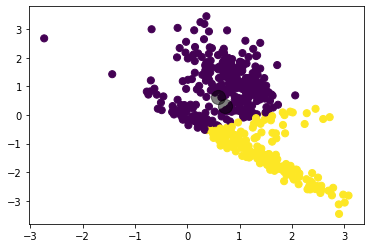

In [104]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=prediction, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.10, random_state=1)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((450, 2), (450,), (50, 2), (50,))

In [106]:
from sklearn.svm import SVC

model = SVC(gamma='auto').fit(X_train, y_train)
print(model.score(X_train, y_train))

0.9666666666666667


In [107]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

0.94


In [108]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[23  2]
 [ 1 24]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        25
           1       0.92      0.96      0.94        25

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



NLTK Stopwords and stemmer

In [109]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [110]:
sw = stopwords.words('english')
print(len(sw))

179


In [111]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")
stemmer.stem("responsiveness")

'respons'

How to prune a Decision Tree to prevent overfitting

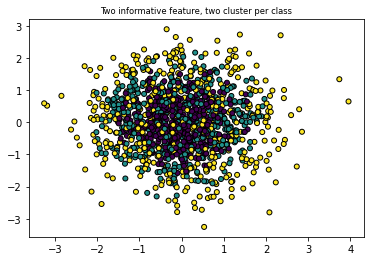

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_gaussian_quantiles

X, y = make_gaussian_quantiles(n_samples=1300, n_features=5, n_classes=3, random_state=1)

df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

plt.title("Two informative feature, two cluster per class", fontsize='small')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

In [113]:
df

,x,y,label
0,-0.880045,-0.653662,0
1,-0.744473,1.583547,0
2,-0.008206,-0.191370,1
3,1.202803,-1.832969,2
4,0.047535,0.233280,0
...,...,...,...
1295,1.428692,-1.119273,2
1296,-1.221052,-0.873885,2
1297,1.442877,-0.539682,2
1298,1.753801,0.975203,2


In [114]:
target = df.label
df.drop(['label'], axis=1, inplace=True)

y = target
X = df

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.10, random_state=1)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

#see:- https://ranvir.xyz/blog/practical-approach-to-tree-pruning-using-sklearn/

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=1, min_samples_split=50, criterion='entropy').fit(X_train, y_train)
print(model.score(X_train, y_train))

0.6239316239316239


In [115]:
path = model.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.00200166, 0.00266522, 0.00303903, 0.0032631 ,
        0.00349594, 0.00354807, 0.00369656, 0.00391647, 0.00423925,
        0.0043825 , 0.00440386, 0.00463411, 0.00466719, 0.00493422,
        0.00525988, 0.00541634, 0.00567882, 0.00633047, 0.00674512,
        0.00730065, 0.0075892 , 0.00911679, 0.00925089, 0.00933651,
        0.01209748, 0.01243316, 0.02435737, 0.05065284, 0.05589774,
        0.0559546 ]),
 'impurities': array([1.06191867, 1.06392033, 1.0745812 , 1.08673732, 1.09000042,
        1.09349636, 1.10059251, 1.10428907, 1.13170433, 1.13594358,
        1.14032607, 1.14472993, 1.18643695, 1.20510573, 1.21003995,
        1.21529983, 1.2261325 , 1.23749014, 1.2438206 , 1.25056572,
        1.25786637, 1.26545557, 1.27457236, 1.28382325, 1.29315976,
        1.30525724, 1.3176904 , 1.36640513, 1.41705797, 1.52885346,
        1.58480805])}

Text(0, 0.5, 'total impurity of leaves')

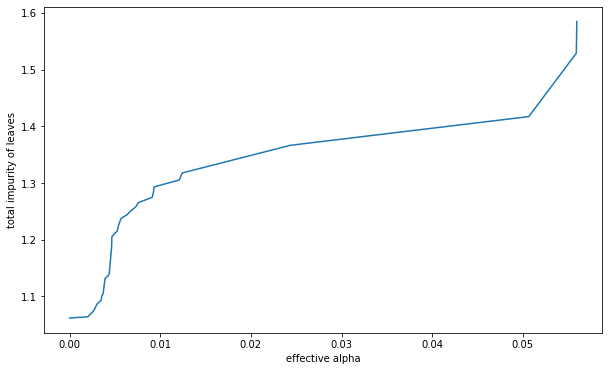

In [116]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

In [117]:
models = []

for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    models.append(model)

Text(0, 0.5, 'Accuracy scores')

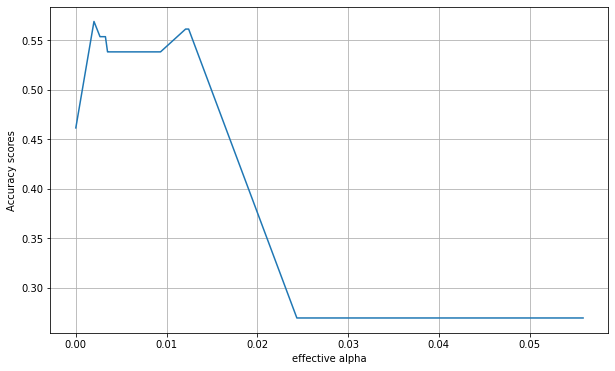

In [118]:
from sklearn.metrics import accuracy_score

acc_scores = [accuracy_score(y_val, model.predict(X_val)) for model in models]

tree_depths = [model.tree_.max_depth for model in models]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

In [119]:
model = DecisionTreeClassifier(random_state=1, min_samples_split=50, criterion='entropy', ccp_alpha=0.012).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.576068376068376


In [120]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

0.5230769230769231


In [121]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[34 14  0]
 [12 11 12]
 [11 13 23]]
              precision    recall  f1-score   support

           0       0.60      0.71      0.65        48
           1       0.29      0.31      0.30        35
           2       0.66      0.49      0.56        47

    accuracy                           0.52       130
   macro avg       0.51      0.50      0.50       130
weighted avg       0.54      0.52      0.52       130



In [122]:
from sklearn.cluster import KMeans

kmeans = kmeans = KMeans(n_clusters=3, max_iter=1000, algorithm = 'auto', random_state=1).fit(X)
prediction = kmeans.predict(X)

pred_df = pd.DataFrame({'actual': y, 'prediction': prediction})
print(pred_df)

      actual  prediction
0          0           2
1          0           2
2          1           1
3          2           1
4          0           0
...      ...         ...
1295       2           1
1296       2           2
1297       2           1
1298       2           0
1299       1           1

[1300 rows x 2 columns]


In [123]:
correct = 0

for i in range(len(y)):
  if prediction[i] == y[i]:
    correct += 1

print(correct/len(y))

0.31076923076923074


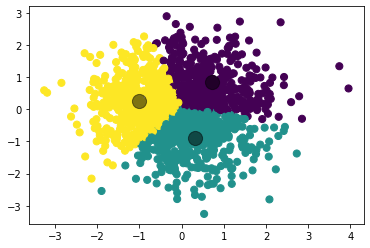

In [124]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=prediction, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

Cross validation score

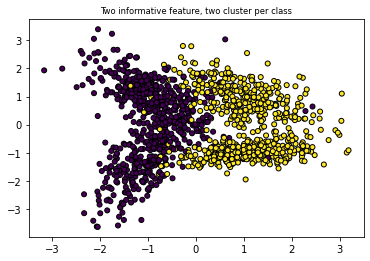

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1300, n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=2)

df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

plt.title("Two informative feature, two cluster per class", fontsize='small')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

In [126]:
df

,x,y,label
0,0.933507,1.493408,1
1,0.323763,0.815564,1
2,1.659497,0.694412,1
3,-0.600851,-0.953426,0
4,1.601156,1.304027,1
...,...,...,...
1295,-1.334963,1.111261,0
1296,-1.978319,1.655717,0
1297,0.851956,1.202375,1
1298,0.706394,-0.623253,1


In [127]:
target = df.label
df.drop(['label'], axis=1, inplace=True)

y = target
X = df

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.10, random_state=1)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((1170, 2), (1170,), (130, 2), (130,))

In [128]:
#see:- https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

model = ExtraTreesClassifier(n_estimators=100, random_state=1, min_samples_split=50, max_depth=15).fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=5)
print(scores)

[0.94017094 0.96153846 0.94871795 0.94871795 0.97863248]


In [129]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.96 accuracy with a standard deviation of 0.01


In [130]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

0.8923076923076924


In [131]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[56  8]
 [ 6 60]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        64
           1       0.88      0.91      0.90        66

    accuracy                           0.89       130
   macro avg       0.89      0.89      0.89       130
weighted avg       0.89      0.89      0.89       130



Confusion Matrix

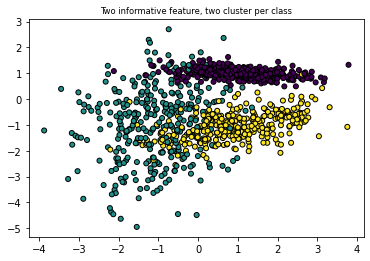

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_classes = 3, n_features=3, n_redundant=0, n_informative=3,n_clusters_per_class=1, random_state=1)

df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

plt.title("Two informative feature, two cluster per class", fontsize='small')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

In [133]:
df

,x,y,label
0,1.091867,-1.443876,2
1,1.151659,-1.142928,2
2,-1.587040,-0.522103,1
3,-1.436279,0.241365,1
4,-0.288996,-1.379282,2
...,...,...,...
995,1.983228,1.041011,0
996,-0.440047,-0.398413,2
997,-1.133449,-1.137080,1
998,1.819388,0.689497,0


In [134]:
target = df.label
df.drop(['label'], axis=1, inplace=True)

y = target
X = df

X = (X - X.min()) / (X.max() - X.min())
X

,x,y
0,0.648586,0.457910
1,0.656390,0.497258
2,0.298940,0.578430
3,0.318617,0.678253
4,0.468358,0.466355
...,...,...
995,0.764924,0.782806
996,0.448643,0.594603
997,0.358142,0.498023
998,0.743540,0.736846


In [135]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.10, random_state=1)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((900, 2), (900,), (100, 2), (100,))

In [136]:
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV(cv=5, random_state=1).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.8777777777777778


In [137]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

0.85


In [138]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_val, y_pred))
print("")
print(classification_report(y_val, y_pred))

[[34  0  0]
 [ 3 22  3]
 [ 1  8 29]]

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        34
           1       0.73      0.79      0.76        28
           2       0.91      0.76      0.83        38

    accuracy                           0.85       100
   macro avg       0.84      0.85      0.84       100
weighted avg       0.85      0.85      0.85       100

